# 실습05. SVM 적용을 위해 심장병 데이터를 이용하기 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_palette('Set1')

### 1) Reading Dataset

In [2]:
data = pd.read_csv('./input/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- 심장 데이터 분석 

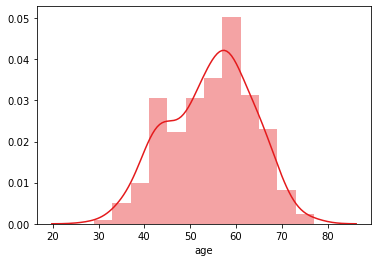

In [3]:
sns.distplot(data['age']);

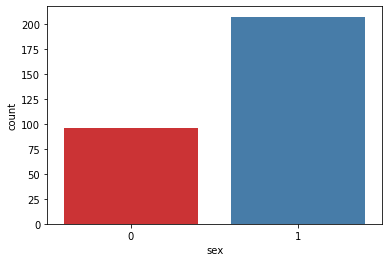

In [4]:
# 1 = male; 0 = female
sns.countplot(data['sex']);

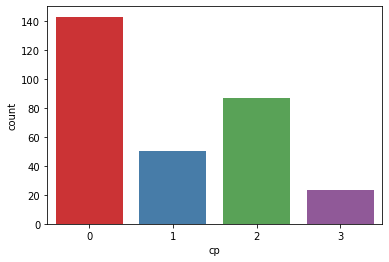

In [5]:
sns.countplot(data['cp']);

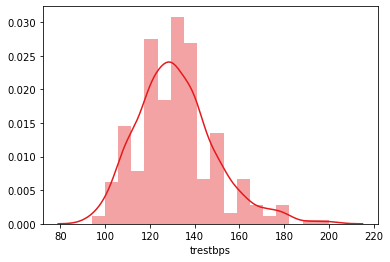

In [6]:
sns.distplot(data['trestbps'])

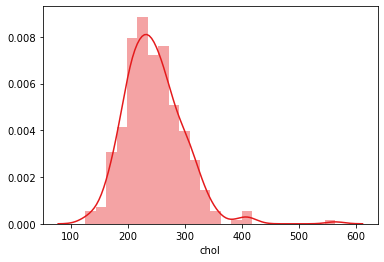

In [7]:
sns.distplot(data['chol'])

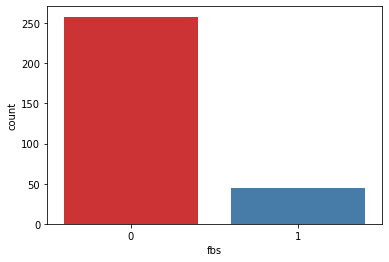

In [8]:
sns.countplot(data['fbs']);

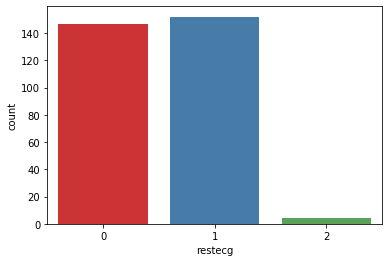

In [9]:
sns.countplot(data['restecg']);

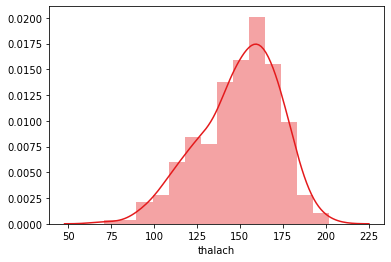

In [10]:
sns.distplot(data['thalach'])

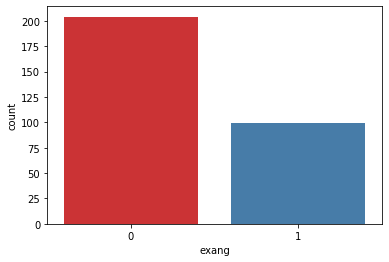

In [11]:
sns.countplot(data['exang']);

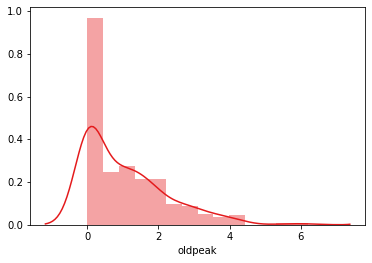

In [12]:
sns.distplot(data['oldpeak']);

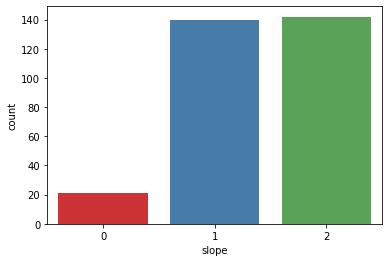

In [13]:
sns.countplot(data['slope']);

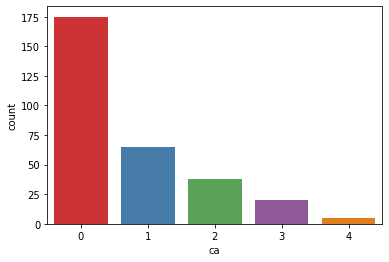

In [14]:
sns.countplot(data['ca']);

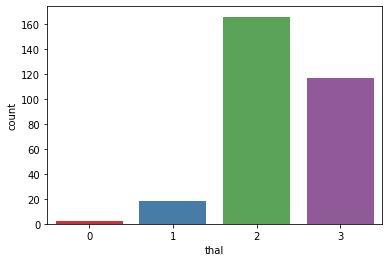

In [15]:
sns.countplot(data['thal']);

### 2) 데이터의 상관관계 분석

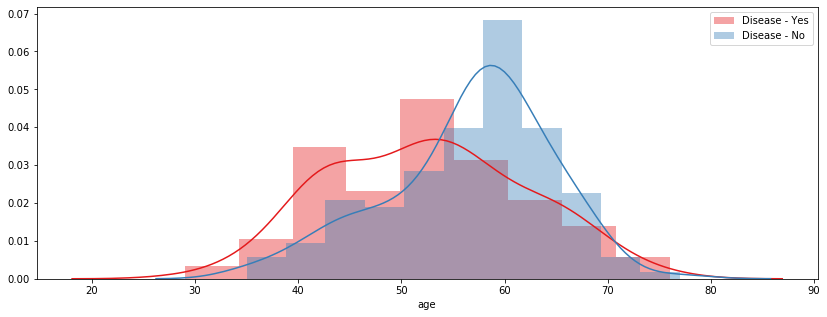

In [16]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['age'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['age'], label= "Disease - No")
plt.legend();

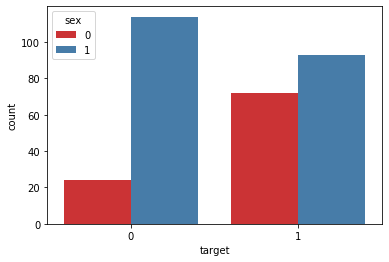

In [17]:
# 1 = male; 0 = female
sns.countplot(data['target'], hue = data['sex']);

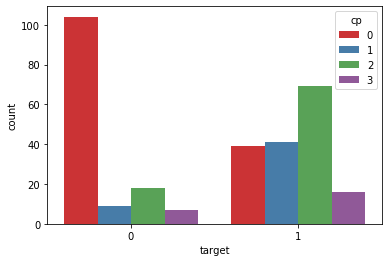

In [18]:
sns.countplot(data['target'], hue = data['cp']);

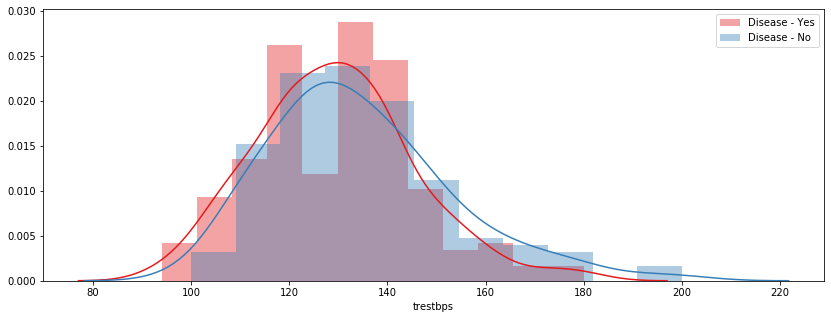

In [19]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['trestbps'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['trestbps'], label= "Disease - No")
plt.legend();

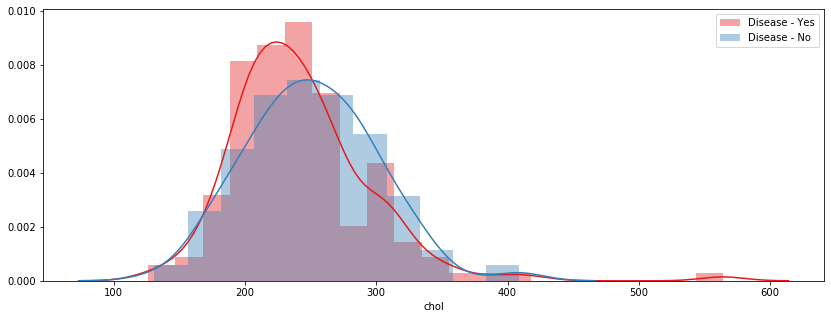

In [20]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['chol'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['chol'], label= "Disease - No")
plt.legend();

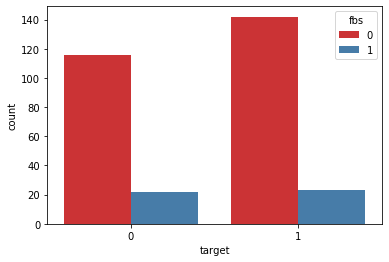

In [21]:
sns.countplot(data['target'], hue = data['fbs']);

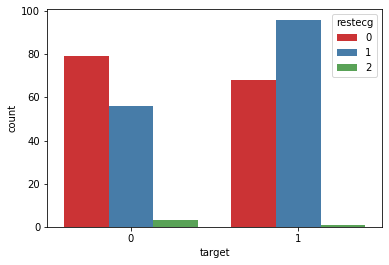

In [22]:
sns.countplot(data['target'] ,hue = data['restecg']);

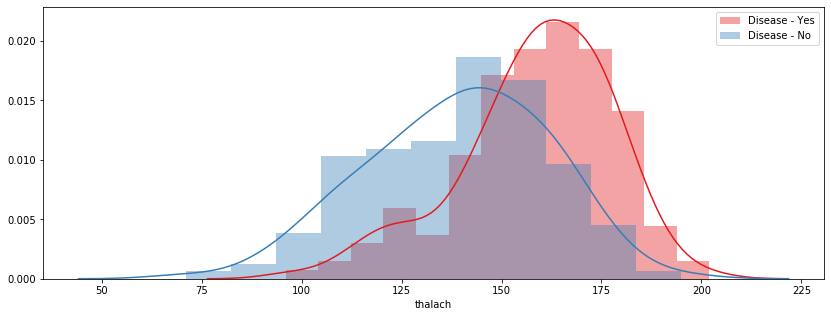

In [23]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['thalach'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['thalach'], label= "Disease - No")
plt.legend();

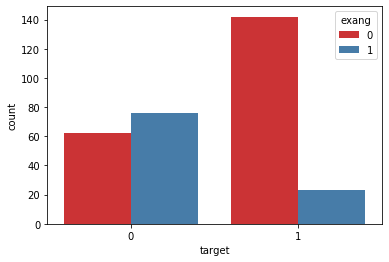

In [24]:
sns.countplot(data['target'], hue = data['exang']);

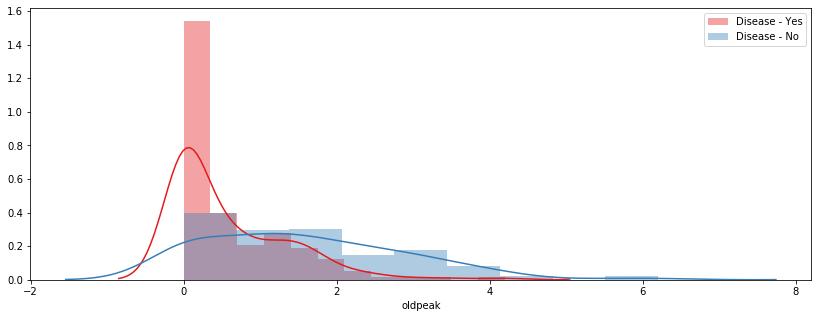

In [25]:
plt.figure(figsize=(14, 5))
sns.distplot(data[data['target'] == 1]['oldpeak'], label= "Disease - Yes")
sns.distplot(data[data['target'] == 0]['oldpeak'], label= "Disease - No")
plt.legend();

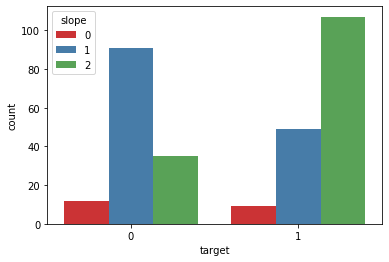

In [26]:
sns.countplot(data['target'], hue = data['slope']);

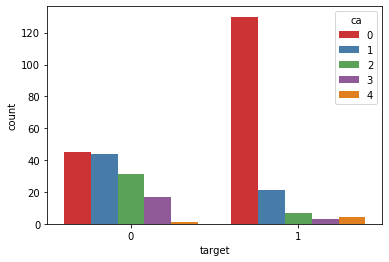

In [27]:
sns.countplot(data['target'], hue = data['ca']);

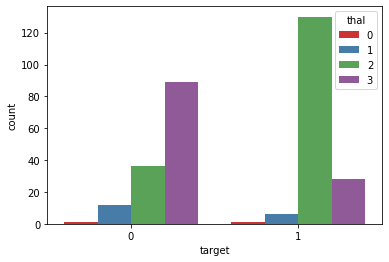

In [28]:
sns.countplot(data['target'], hue = data['thal']);

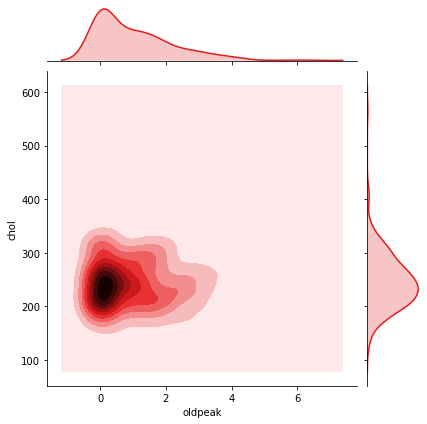

In [29]:
sns.jointplot(x= 'oldpeak' , y= 'chol' ,data= data, kind= 'kde');

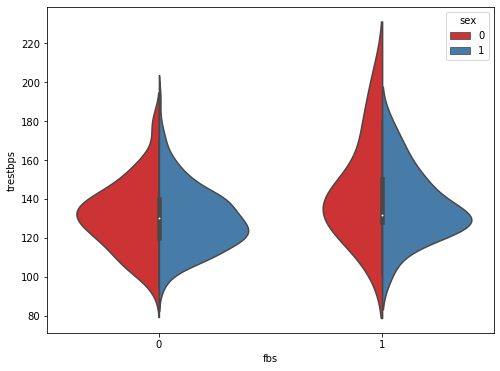

In [30]:
plt.figure(figsize=(8,6))
sns.violinplot(x = 'fbs',y= 'trestbps', data = data, hue = 'sex', split=True);

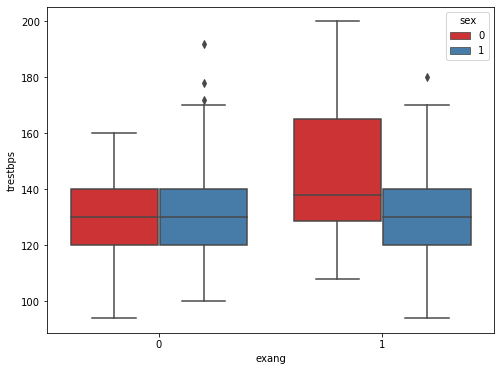

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(x = 'exang',y= 'trestbps', data = data, hue = 'sex');

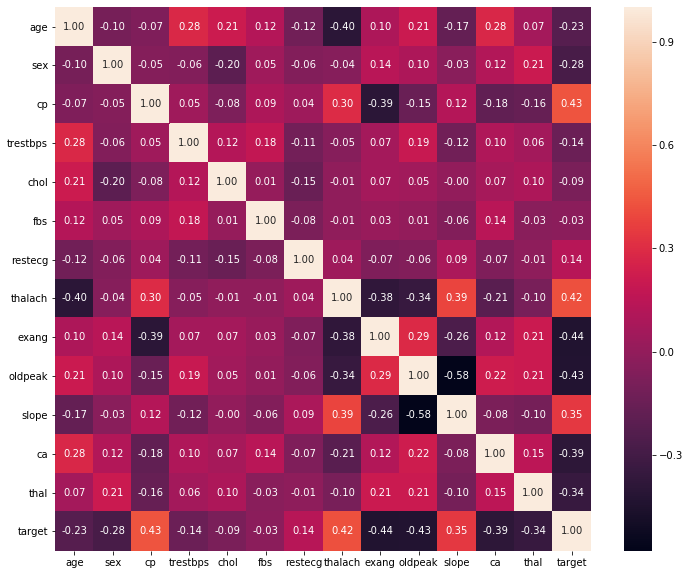

In [34]:
# 상관관계 매트릭스 
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot= True, fmt='.2f')
plt.show();

C:\Users\user\Anaconda3\envs\tf-cpu\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\user\Anaconda3\envs\tf-cpu\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


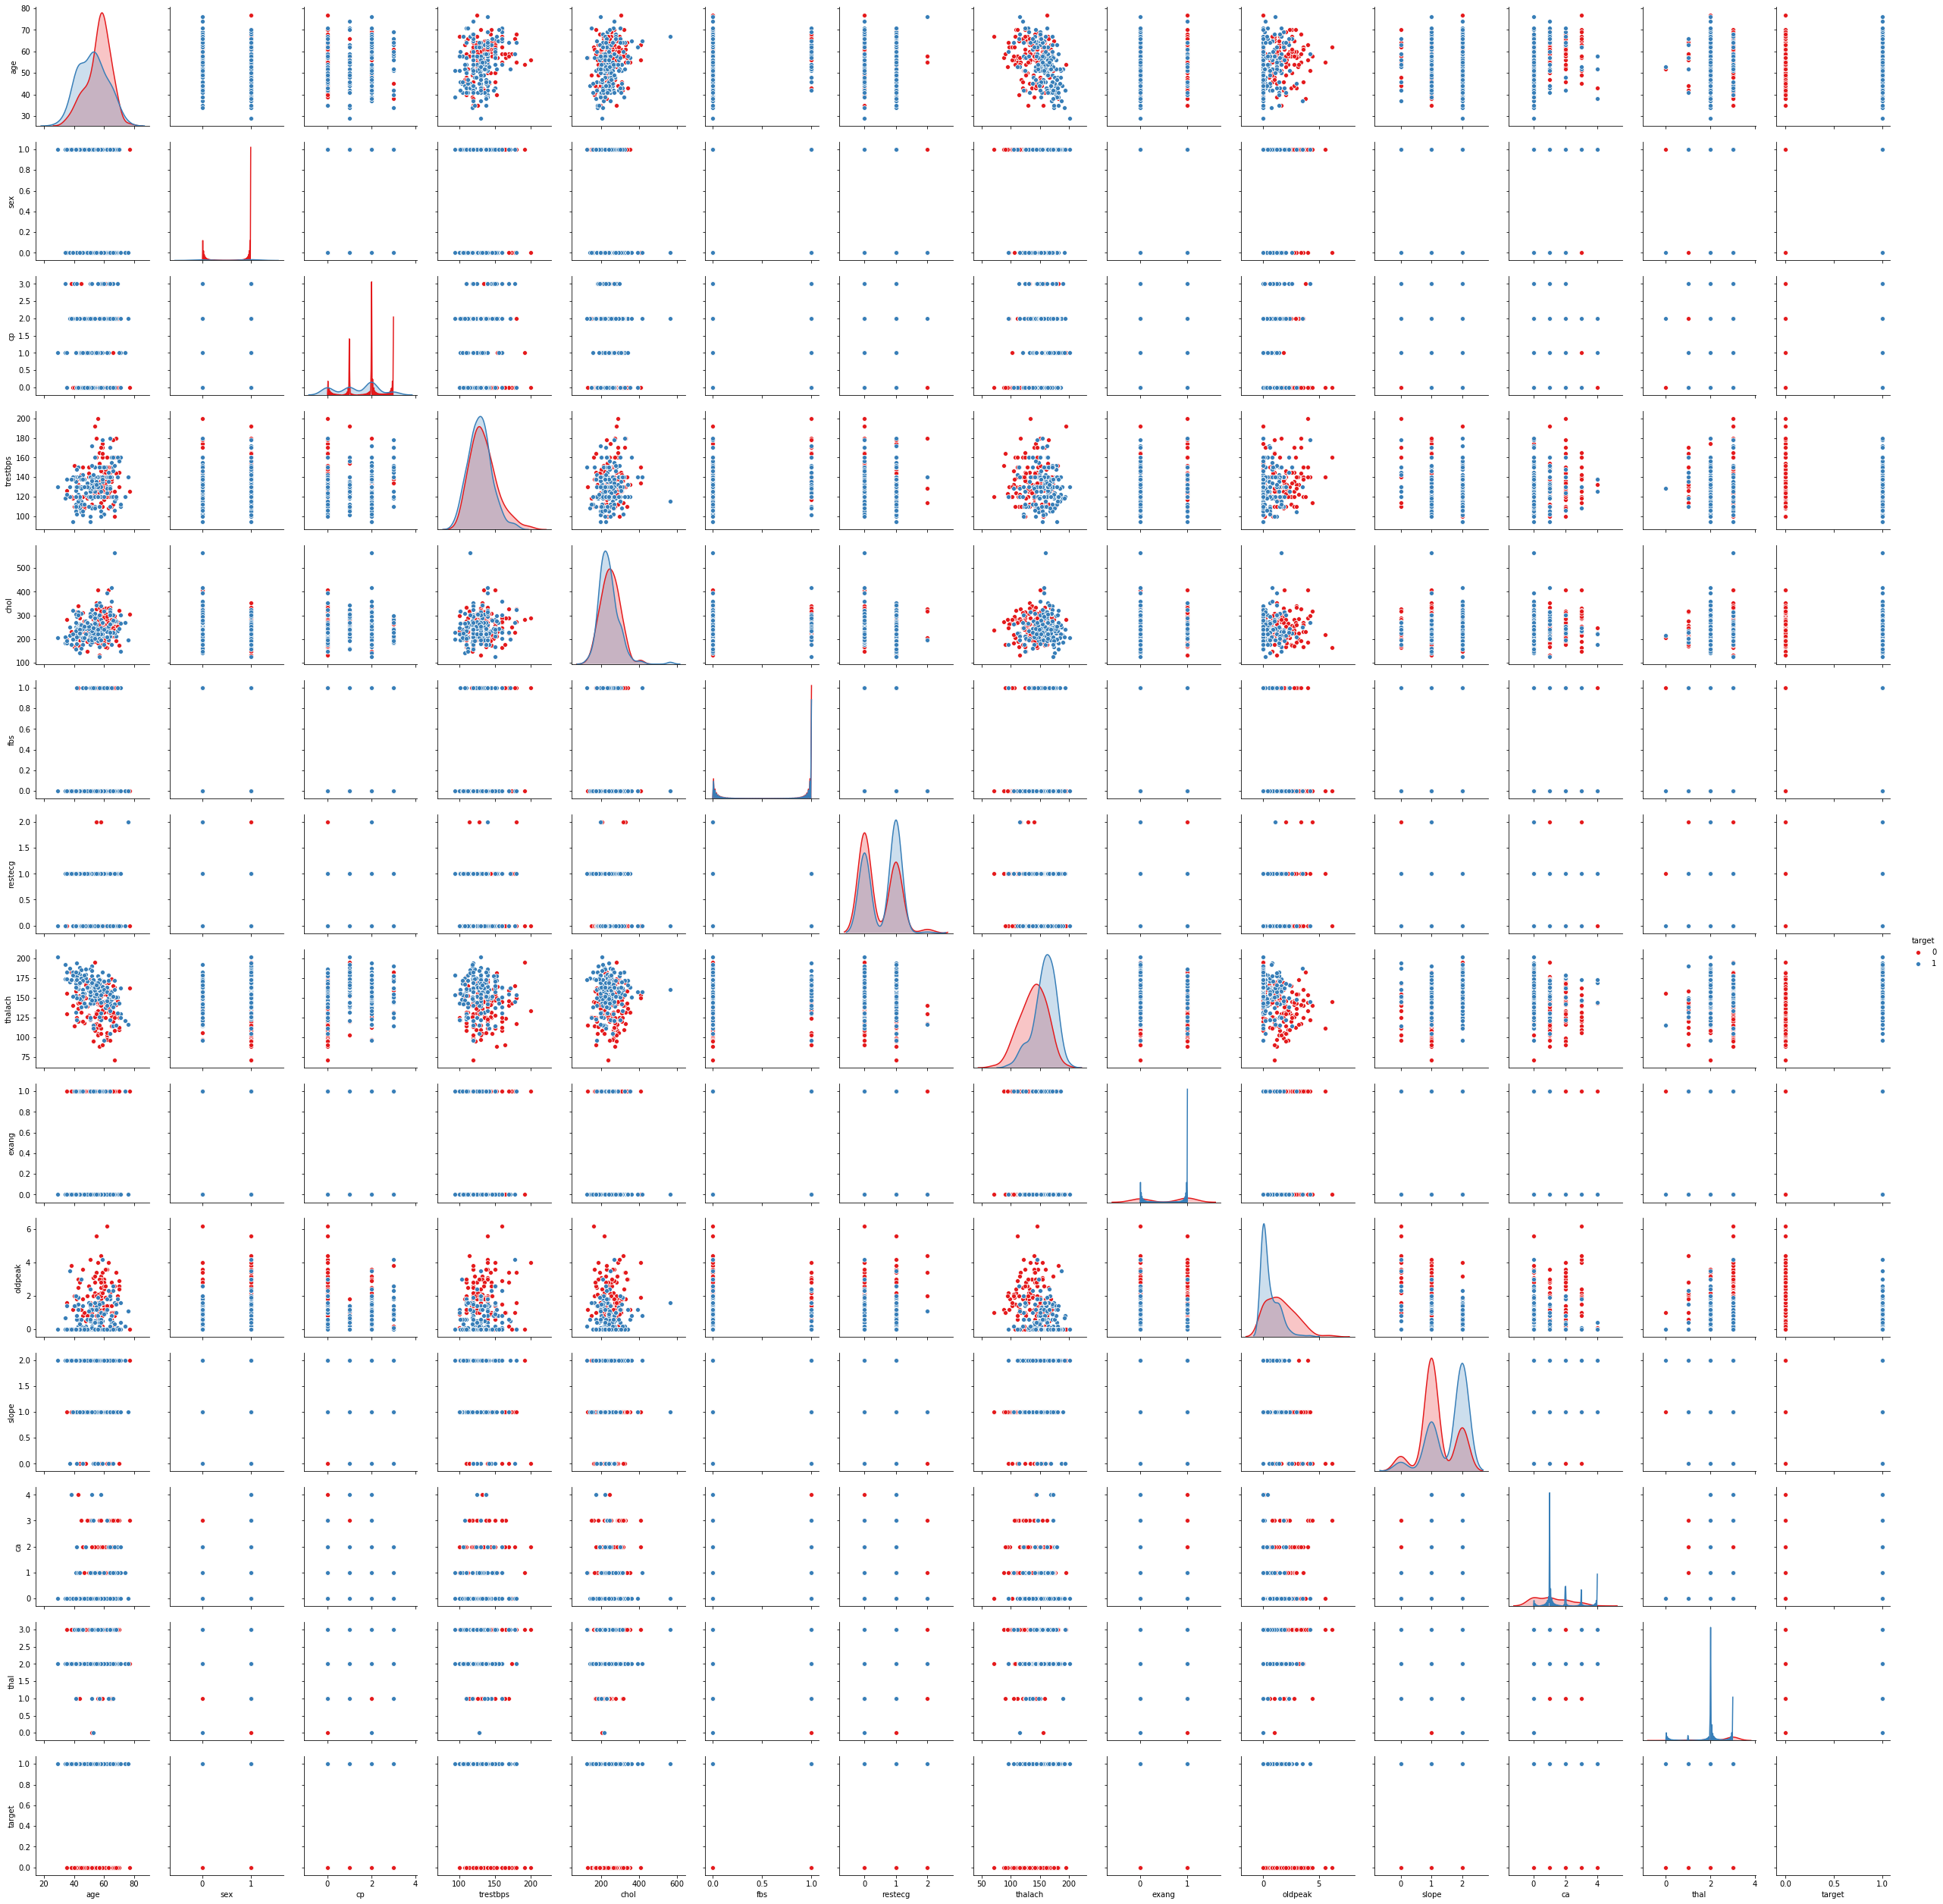

In [33]:
sns.pairplot(data, hue = 'target');

### 3) Data Preprocessing
- 카테로리컬 데이터를 변환하지 

In [35]:
sex = pd.get_dummies(data['sex'])
cp = pd.get_dummies(data['cp'])
fbs = pd.get_dummies(data['fbs'])
restecg = pd.get_dummies(data['restecg'])
exang = pd.get_dummies(data['exang'])
slope = pd.get_dummies(data['slope'])
ca = pd.get_dummies(data['ca'])
thal = pd.get_dummies(data['thal'])

In [36]:
data = pd.concat([data, sex, cp, fbs, restecg, exang, slope, ca, thal], axis = 1)

In [37]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,2,0,1,2,3,4,0,1,2,3
0,63,1,3,145,233,1,0,150,0,2.3,...,0,1,0,0,0,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,0,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,1,0,0,0,0,0,0,1,0
3,56,1,1,120,236,0,1,178,0,0.8,...,1,1,0,0,0,0,0,0,1,0
4,57,0,0,120,354,0,1,163,1,0.6,...,1,1,0,0,0,0,0,0,1,0


In [38]:
data.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], axis = 1, inplace= True)

### 4) Support Vector Machine (스케일 없이 그냥 해볼까?)

In [39]:
from sklearn.svm import SVC
model = SVC(probability=True)
from sklearn.model_selection import train_test_split

X = data.drop('target', axis = 1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
        test_size=0.3, random_state=42)

In [40]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56        41
           1       0.66      0.90      0.76        50

    accuracy                           0.69        91
   macro avg       0.72      0.67      0.66        91
weighted avg       0.72      0.69      0.67        91



### 5) Support Vector Machine (스케일을 적용하자)


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



- Receiver Operating Characteristic (ROC) 

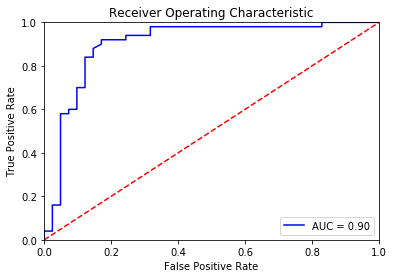

In [42]:
y_prob = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- Learning Curves


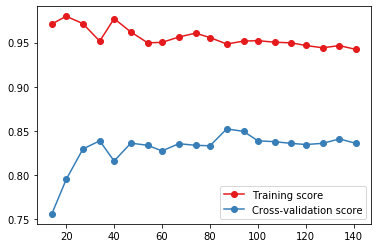

In [43]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVC(), X_train,
    y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)

train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)

plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

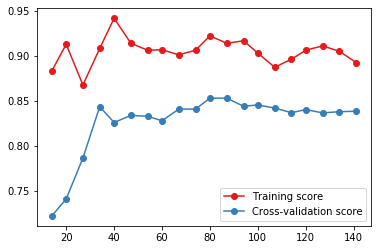

In [44]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=3, gamma=0.01), 
    X_train, y_train, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 20), cv = 3)
train_scores = np.mean(train_scores, axis = 1)
test_scores = np.mean(test_scores, axis = 1)
plt.plot(train_sizes, train_scores, 'o-', label="Training score")
plt.plot(train_sizes, test_scores, 'o-', label="Cross-validation score")
plt.legend();

- GridSearchCV

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[1,2,3,4,5,6,7,8,14], 
    'gamma':[0.1, 0.01, 0.001, 0.0001], 
    'kernel':['linear', 'poly', 'rbf'], 
    'degree': [1,2,3,4,5]}

grid = GridSearchCV(param_grid= param_grid, estimator= SVC(), 
    scoring='f1', refit= True, verbose=1)

In [46]:
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2700 out of 2700 | elapsed:    8.0s finished


{'C': 5, 'degree': 1, 'gamma': 0.1, 'kernel': 'poly'}

- GridSearchCV 좀더 자세히 적용

In [47]:
param_grid = {'C':[6,7,8], 
              'gamma':np.linspace(0.01, 0.02, 10), 
              'kernel':['rbf'], 'degree': [1,2,3,4,5]}
grid = GridSearchCV(param_grid= param_grid, estimator= SVC(probability= True), 
                scoring='f1', refit= True, verbose=1)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:    4.7s finished


{'C': 6, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [48]:
y_pred = grid.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



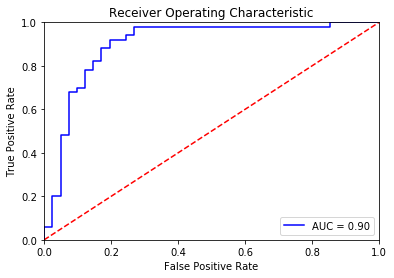

In [50]:
y_prob = grid.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [53]:
result = pd.DataFrame({'Test':y_test, 'Prediction':y_pred, 'Probability': y_prob[:,1]})
result.to_csv('Result.csv')